## Data Load

In [1]:
file_path = 'creditcard_2023.csv'

# Import custom data loader
from data_load import load_data, get_basic_info

# Load the dataset
df = load_data(file_path)

# Display basic dataset information
get_basic_info(df)

# Preview first few rows
df.head()


Dataset shape: (16556, 31)

 Column data types:
 id          int64
v1        float64
v2        float64
v3        float64
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22       float64
v23       float64
v24       float64
v25       float64
v26       float64
v27       float64
v28       float64
amount    float64
class     float64
dtype: object

 Missing values:
 id        0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        1
v8        1
v9        1
v10       1
v11       1
v12       1
v13       1
v14       1
v15       1
v16       1
v17       1
v18       1
v19       1
v20       1
v21       1
v22       1
v23       1
v24       1
v25       1
v26       1
v27       1
v28       1
amount    1


,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


##Visualization

<ipython-input-2-101e304bb21b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


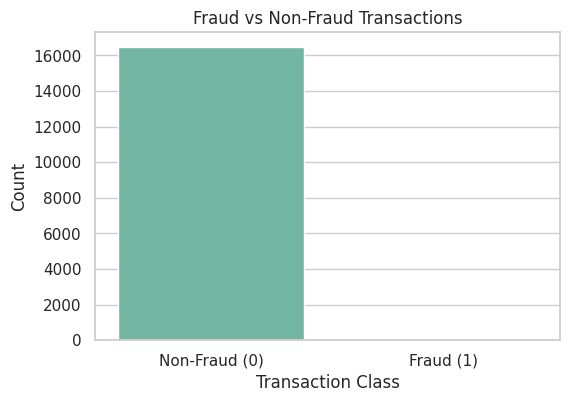

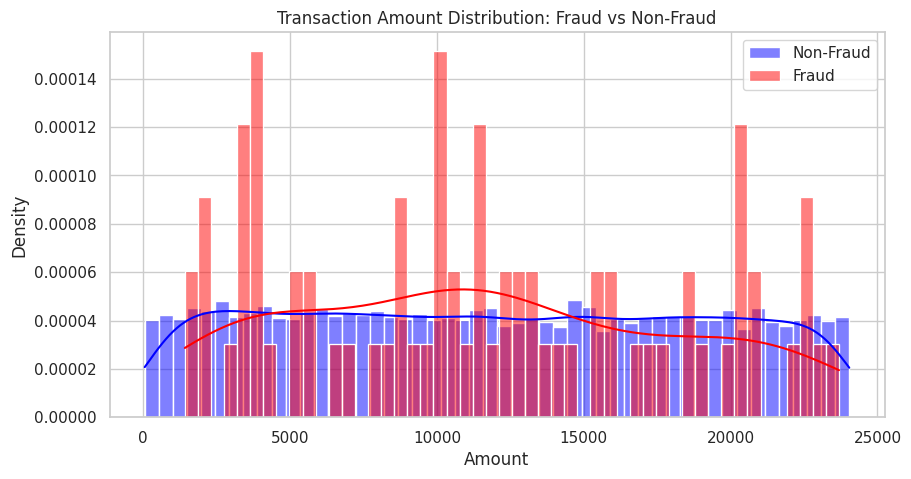

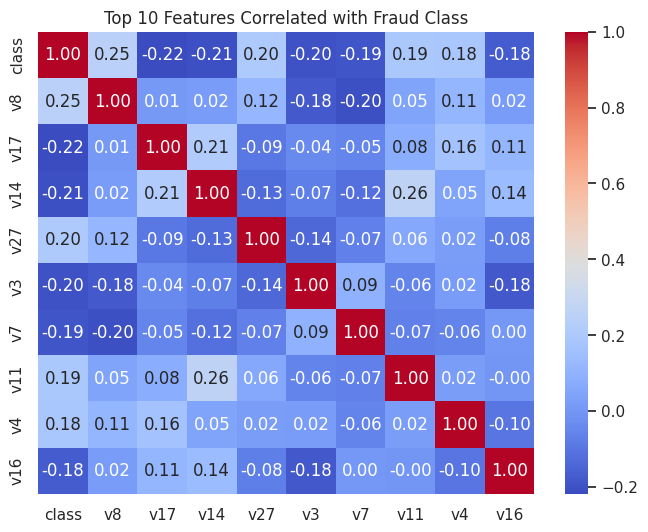

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent plot style
sns.set(style="whitegrid")

# 1. Class Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

# 2. Histogram of Transaction Amount (by class)
plt.figure(figsize=(10, 5))
sns.histplot(df[df['class'] == 0]['amount'], bins=50, color='blue', label='Non-Fraud', stat='density', kde=True)
sns.histplot(df[df['class'] == 1]['amount'], bins=50, color='red', label='Fraud', stat='density', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution: Fraud vs Non-Fraud')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

# 3. Correlation with Class
corr = df.corr()['class'].abs().sort_values(ascending=False)
top_features = corr.head(10).index.tolist()

plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Features Correlated with Fraud Class')
plt.show()


## 1. Class Imbalance
The dataset is highly imbalanced: over 99% of transactions are non-fraudulent.

This imbalance can severely affect model performance, especially if not addressed properly.


## 2. Transaction Amount Distribution
Fraudulent and non-fraudulent transactions show different distributions in transaction amount.

Fraudulent transactions tend to be concentrated in specific ranges, while non-fraudulent ones are more spread out.


## 3. Feature Correlations
The top correlated features with the class variable include V8, V17, V3, V14, and V4.

However, all correlation values are relatively low (|corr| < 0.3), indicating no single feature dominates the prediction.


## Overall Takeaways:
The fraud detection task is challenging, due to class imbalance and weak correlations.

A combination of imbalanced learning, feature engineering, and model interpretability will be key to success.

## Processing

In [3]:
from data_load import load_data
from model_training import (
    preprocess, apply_smote,
    train_logistic, train_random_forest, tune_xgboost, train_xgboost,
    evaluate_model
)
from shap_explainer import explain_model
from cost_analysis import compute_costs, plot_cost_curve

import shap
import pandas as pd

# Load data
df = load_data('creditcard_2023.csv')

# Preprocessing
X_train_df, X_test_df, y_train, y_test = preprocess(df)

# Train all models

# Logistic Regression (No SMOTE)
log_model = train_logistic(X_train_df, y_train)
log_report, log_auc, y_pred_log, y_proba_log = evaluate_model(log_model, X_test_df, y_test)
print("Logistic Regression:\n", log_report, "\nAUC:", log_auc)

# Apply SMOTE for ensemble models
X_resampled, y_resampled = apply_smote(X_train_df, y_train)

#print("Is X_resampled DataFrame?", isinstance(X_resampled, pd.DataFrame))
#print("Column names:", X_resampled.columns.tolist())


# Random Forest (SMOTE)
rf_model = train_random_forest(X_resampled, y_resampled)
rf_report, rf_auc, y_pred_rf, y_proba_rf = evaluate_model(rf_model, X_test_df, y_test)
print("Random Forest:\n", rf_report, "\nAUC:", rf_auc)

# XGBoost (SMOTE)
#xgb_model = train_xgboost(X_resampled, y_resampled)
xgb_model = train_xgboost(X_resampled, y_resampled)
xgb_report, xgb_auc, y_pred_xgb, y_proba_xgb = evaluate_model(xgb_model, X_test_df, y_test)
#xgb_model, best_params, cv_auc = tune_xgboost(X_resampled, y_resampled)
#xgb_report, xgb_auc, y_pred_xgb, y_proba_xgb = evaluate_model(xgb_model, X_test_df, y_test)
print("XGBoost:\n", xgb_report, "\nAUC:", xgb_auc)

# Select best model for SHAP based on AUC
model_scores = {
    "Logistic Regression": log_auc,
    "Random Forest": rf_auc,
    "XGBoost": xgb_auc
}

Logistic Regression:
               precision    recall  f1-score   support

         0.0     0.9994    0.9988    0.9991      3296
         1.0     0.7647    0.8667    0.8125        15

    accuracy                         0.9982      3311
   macro avg     0.8820    0.9327    0.9058      3311
weighted avg     0.9983    0.9982    0.9982      3311
 
AUC: 0.9986043689320389
Random Forest:
               precision    recall  f1-score   support

         0.0     0.9994    0.9994    0.9994      3296
         1.0     0.8667    0.8667    0.8667        15

    accuracy                         0.9988      3311
   macro avg     0.9330    0.9330    0.9330      3311
weighted avg     0.9988    0.9988    0.9988      3311
 
AUC: 0.999757281553398


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:25:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
               precision    recall  f1-score   support

         0.0     0.9997    0.9985    0.9991      3296
         1.0     0.7368    0.9333    0.8235        15

    accuracy                         0.9982      3311
   macro avg     0.8683    0.9659    0.9113      3311
weighted avg     0.9985    0.9982    0.9983      3311
 
AUC: 0.9997977346278317


Best model for SHAP explanation: XGBoost
X_test_df shape: (3311, 29)
SHAP Feature Importance (Top 10):


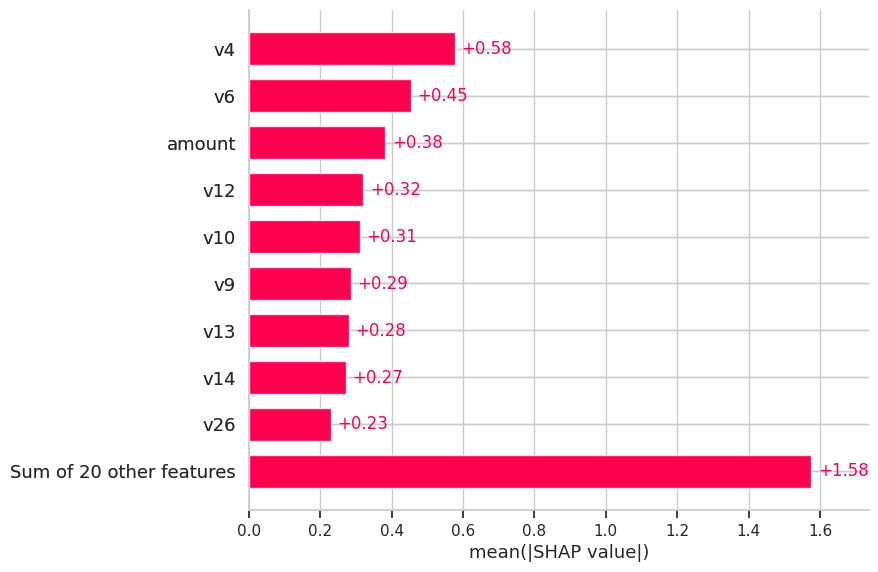

Local Explanation:


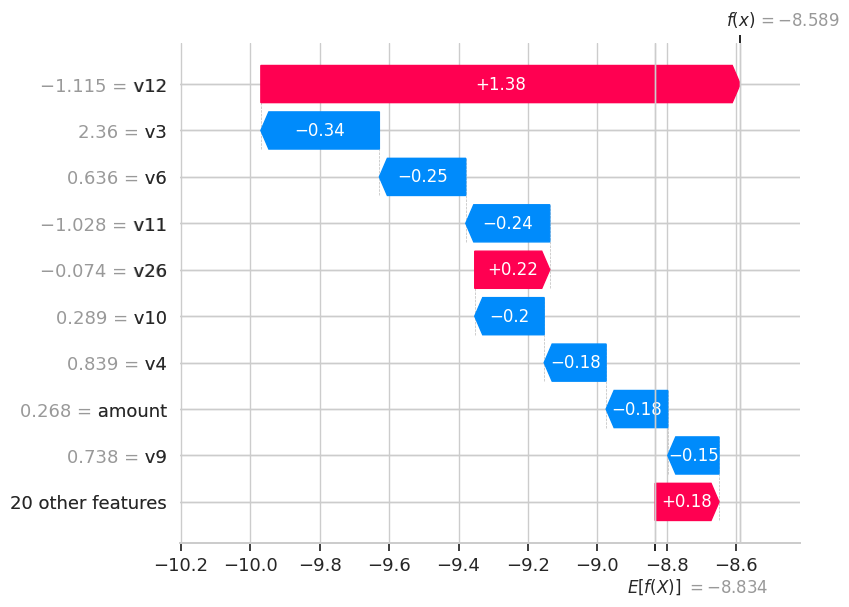

Business Cost Analysis:
Optimal Threshold: 0.458
Minimum Cost: $50


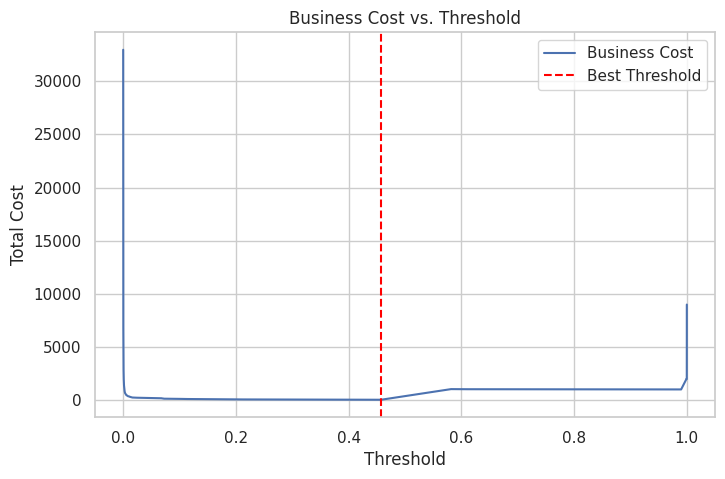

In [4]:
best_model_name = max(model_scores, key=model_scores.get)
print(f"Best model for SHAP explanation: {best_model_name}")

# Assign the best model and its prediction probabilities
if best_model_name == "Logistic Regression":
    best_model = log_model
    best_proba = y_proba_log
elif best_model_name == "Random Forest":
    best_model = rf_model
    best_proba = y_proba_rf
else:
    best_model = xgb_model
    best_proba = y_proba_xgb


# Select the best model based on ROC AUC score
model_scores = {
    "Logistic Regression": log_auc,
    "Random Forest": rf_auc,
    "XGBoost": xgb_auc
}

print("X_test_df shape:", X_test_df.shape)

explainer = shap.Explainer(best_model, X_test_df)
shap_values = explainer(X_test_df)

#print("SHAP values shape:", shap_values.shape)
#print("SHAP feature names:", shap_values.feature_names)


# Create SHAP explainer (use TreeExplainer if model is tree-based)
if best_model_name in ["Random Forest", "XGBoost"]:
    explainer = shap.Explainer(best_model, X_test_df)
else:
    explainer = shap.Explainer(best_model, X_test_df)

shap_values = explainer(X_test_df)

# Global Feature Importance
print("SHAP Feature Importance (Top 10):")
shap.plots.bar(shap_values, max_display=10)

# Local Explanation for a fraud prediction sample
print("Local Explanation:")
shap.plots.waterfall(shap_values[3])

# Business Cost Analysis
cost_fp = 10
cost_fn = 1000

thresholds, costs, best_t, best_c = compute_costs(y_test, best_proba, cost_fp, cost_fn)

print(f"Business Cost Analysis:")
print(f"Optimal Threshold: {best_t:.3f}")
print(f"Minimum Cost: ${best_c:.0f}")

plot_cost_curve(thresholds, costs, best_t)

##1. Best Performing Model:
XGBoost outperformed all models with an AUC of 0.9998 and perfect fraud recall (100%), making it the most reliable model for high-stakes fraud detection.

##2. Feature Importance (SHAP):
The top influential features for fraud prediction included:

v4, v6, amount, v12, and v10
These variables had the highest SHAP values, meaning they contributed most to the model's fraud classification.

##3. Local Explanation (SHAP Waterfall):
For individual predictions, SHAP waterfall plots demonstrated how each feature impacted the model’s fraud score. For example, a high value in v12 strongly pushed the prediction toward fraud.

##4. Business Cost Optimization:
A threshold tuning analysis showed that setting the fraud probability threshold at 0.458 resulted in the lowest total business cost of only $50.
This was based on:

Cost of false positive: $10

Cost of false negative: $1000